In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df_northsea = pd.read_csv('/media/Data-B/my_research/Geoscience_FL/data_well_log/train.csv', delimiter=';')
df_northsea

,WELL,DEPTH_MD,X_LOC,Y_LOC,Z_LOC,GROUP,FORMATION,CALI,RSHA,RMED,...,ROP,DTS,DCAL,DRHO,MUDWEIGHT,RMIC,ROPA,RXO,FORCE_2020_LITHOFACIES_LITHOLOGY,FORCE_2020_LITHOFACIES_CONFIDENCE
0,15/9-13,494.5280,437641.96875,6470972.5,-469.501831,NORDLAND GP.,NaN,19.480835,NaN,1.611410,...,34.636410,NaN,NaN,-0.574928,NaN,NaN,NaN,NaN,65000,1.0
1,15/9-13,494.6800,437641.96875,6470972.5,-469.653809,NORDLAND GP.,NaN,19.468800,NaN,1.618070,...,34.636410,NaN,NaN,-0.570188,NaN,NaN,NaN,NaN,65000,1.0
2,15/9-13,494.8320,437641.96875,6470972.5,-469.805786,NORDLAND GP.,NaN,19.468800,NaN,1.626459,...,34.779556,NaN,NaN,-0.574245,NaN,NaN,NaN,NaN,65000,1.0
3,15/9-13,494.9840,437641.96875,6470972.5,-469.957794,NORDLAND GP.,NaN,19.459282,NaN,1.621594,...,39.965164,NaN,NaN,-0.586315,NaN,NaN,NaN,NaN,65000,1.0
4,15/9-13,495.1360,437641.96875,6470972.5,-470.109772,NORDLAND GP.,NaN,19.453100,NaN,1.602679,...,57.483765,NaN,NaN,-0.597914,NaN,NaN,NaN,NaN,65000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1170506,7/1-2 S,3169.3124,NaN,NaN,NaN,VESTLAND GP.,Bryne Fm.,8.423170,NaN,NaN,...,27.674368,NaN,NaN,-0.001763,NaN,NaN,26.673708,NaN,30000,2.0
1170507,7/1-2 S,3169.4644,NaN,NaN,NaN,VESTLAND GP.,Bryne Fm.,8.379244,NaN,NaN,...,28.024338,NaN,NaN,-0.007600,NaN,NaN,26.840818,NaN,65030,2.0
1170508,7/1-2 S,3169.6164,NaN,NaN,NaN,VESTLAND GP.,Bryne Fm.,8.350248,NaN,NaN,...,28.091282,NaN,NaN,-0.018297,NaN,NaN,27.007942,NaN,65030,2.0
1170509,7/1-2 S,3169.7684,NaN,NaN,NaN,VESTLAND GP.,Bryne Fm.,8.313779,NaN,NaN,...,28.019775,NaN,NaN,-0.011438,NaN,NaN,27.175179,NaN,65030,2.0


In [9]:
lithology_labels = {30000: 'Sandstone',
                 65030: 'Sandstone/Shale',
                 65000: 'Shale',
                 80000: 'Marl',
                 74000: 'Dolomite',
                 70000: 'Limestone',
                 70032: 'Chalk',
                 88000: 'Halite',
                 86000: 'Anhydrite',
                 99000: 'Tuff',
                 90000: 'Coal',
                 93000: 'Basement'}

df_northsea['Lithology'] = df_northsea['FORCE_2020_LITHOFACIES_LITHOLOGY'].map(lithology_labels)

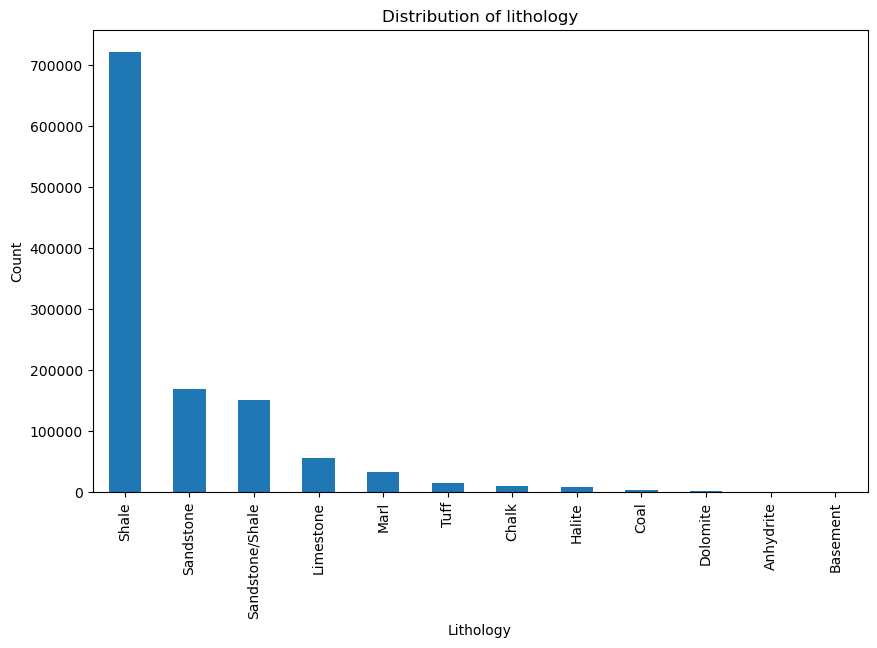

In [10]:
plt.figure(figsize=(10, 6))
df_northsea['Lithology'].value_counts().plot(kind='bar')
plt.title('Distribution of lithology')
plt.xlabel('Lithology')
plt.ylabel('Count')
plt.show()

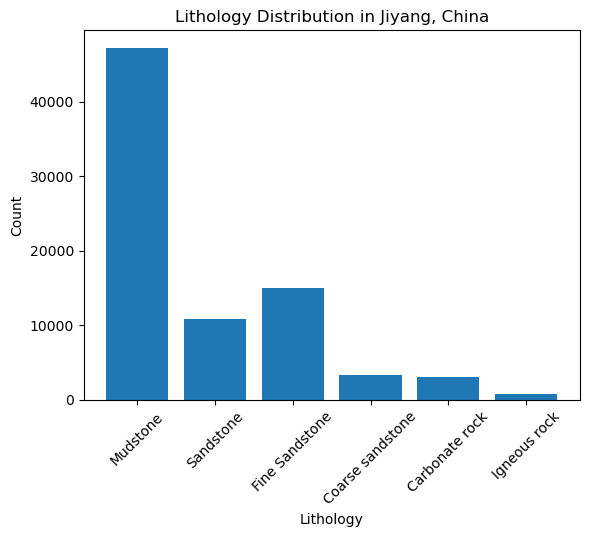

In [3]:
jiyang_lithology = {
    'Mudstone': 36411 + 10829,
    'Sandstone': 10829,
    'Fine Sandstone': 15014,
    'Coarse sandstone': 3344,
    'Carbonate rock': 1272 + 1851,
    'Igneous rock': 736,
}
jiyang_lithotype = list(jiyang_lithology.keys())
jiyang_lithotype_counts = list(jiyang_lithology.values())

plt.bar(jiyang_lithotype, jiyang_lithotype_counts)
plt.xlabel('Lithology')
plt.ylabel('Count')
plt.title('Lithology Distribution in Jiyang, China')
plt.xticks(rotation=45)
plt.show()

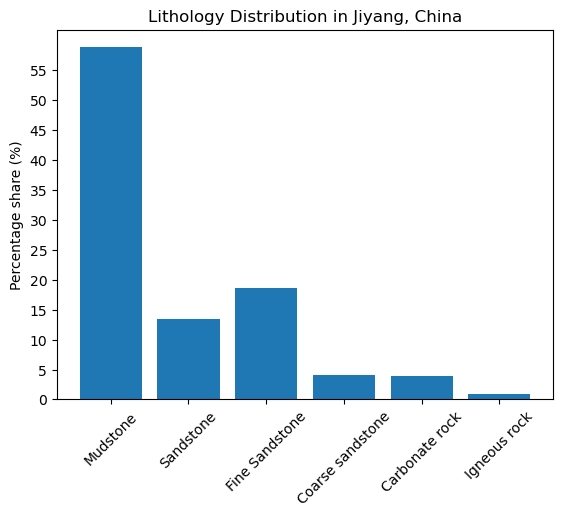

In [4]:
total_samples = sum(jiyang_lithology.values())

jiyang_lithotype = list(jiyang_lithology.keys())
jiyang_lithotype_counts = [count / total_samples * 100 for count in jiyang_lithology.values()]

plt.bar(jiyang_lithotype, jiyang_lithotype_counts)
plt.ylabel('Percentage share (%)')
plt.title('Lithology Distribution in Jiyang, China')
plt.xticks(rotation=45)
# Set y-axis ticks at intervals of 5
plt.yticks(range(0, int(max(jiyang_lithotype_counts))+1, 5))
plt.show()